In [1]:
import pandas as pd 
import missingno as msno 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 


# Objectives: 
# 1. Find relationships between Price and Points (score) 
# 2. Find relationships between Price and Location, Score and Location 

In [2]:
#### Importing Data ####
winereviews_first = pd.read_csv('winemag-data_first150k.csv')
winereviews_second = pd.read_csv('winemag-data-130k-v2.csv')

In [3]:
#### Checking for and Removing perfect Duplicates for space efficiency ####
merged_reviews = pd.merge(winereviews_first, winereviews_second, on = list(winereviews_first.columns), \
                          how = 'inner') # merge on all columns 
winereviews_first = pd.concat([winereviews_first, merged_reviews], ignore_index=True)
winereviews_first['Duplicated'] = winereviews_first.duplicated(keep = False)
# marks all duplicates as True

winereviews_dirty = winereviews_first[~winereviews_first['Duplicated']] # select 'Duplicated' == False only 
del winereviews_dirty['Duplicated'] # remove 'Duplicated' column
del winereviews_dirty['Unnamed: 0'] # remove random column 

print(winereviews_dirty.shape)
# 150,931 rows and 13 columns 
print(winereviews_dirty.columns)
print(winereviews_dirty.head())

(150931, 13)
Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery', 'taster_name',
       'taster_twitter_handle', 'title'],
      dtype='object')
  country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                     

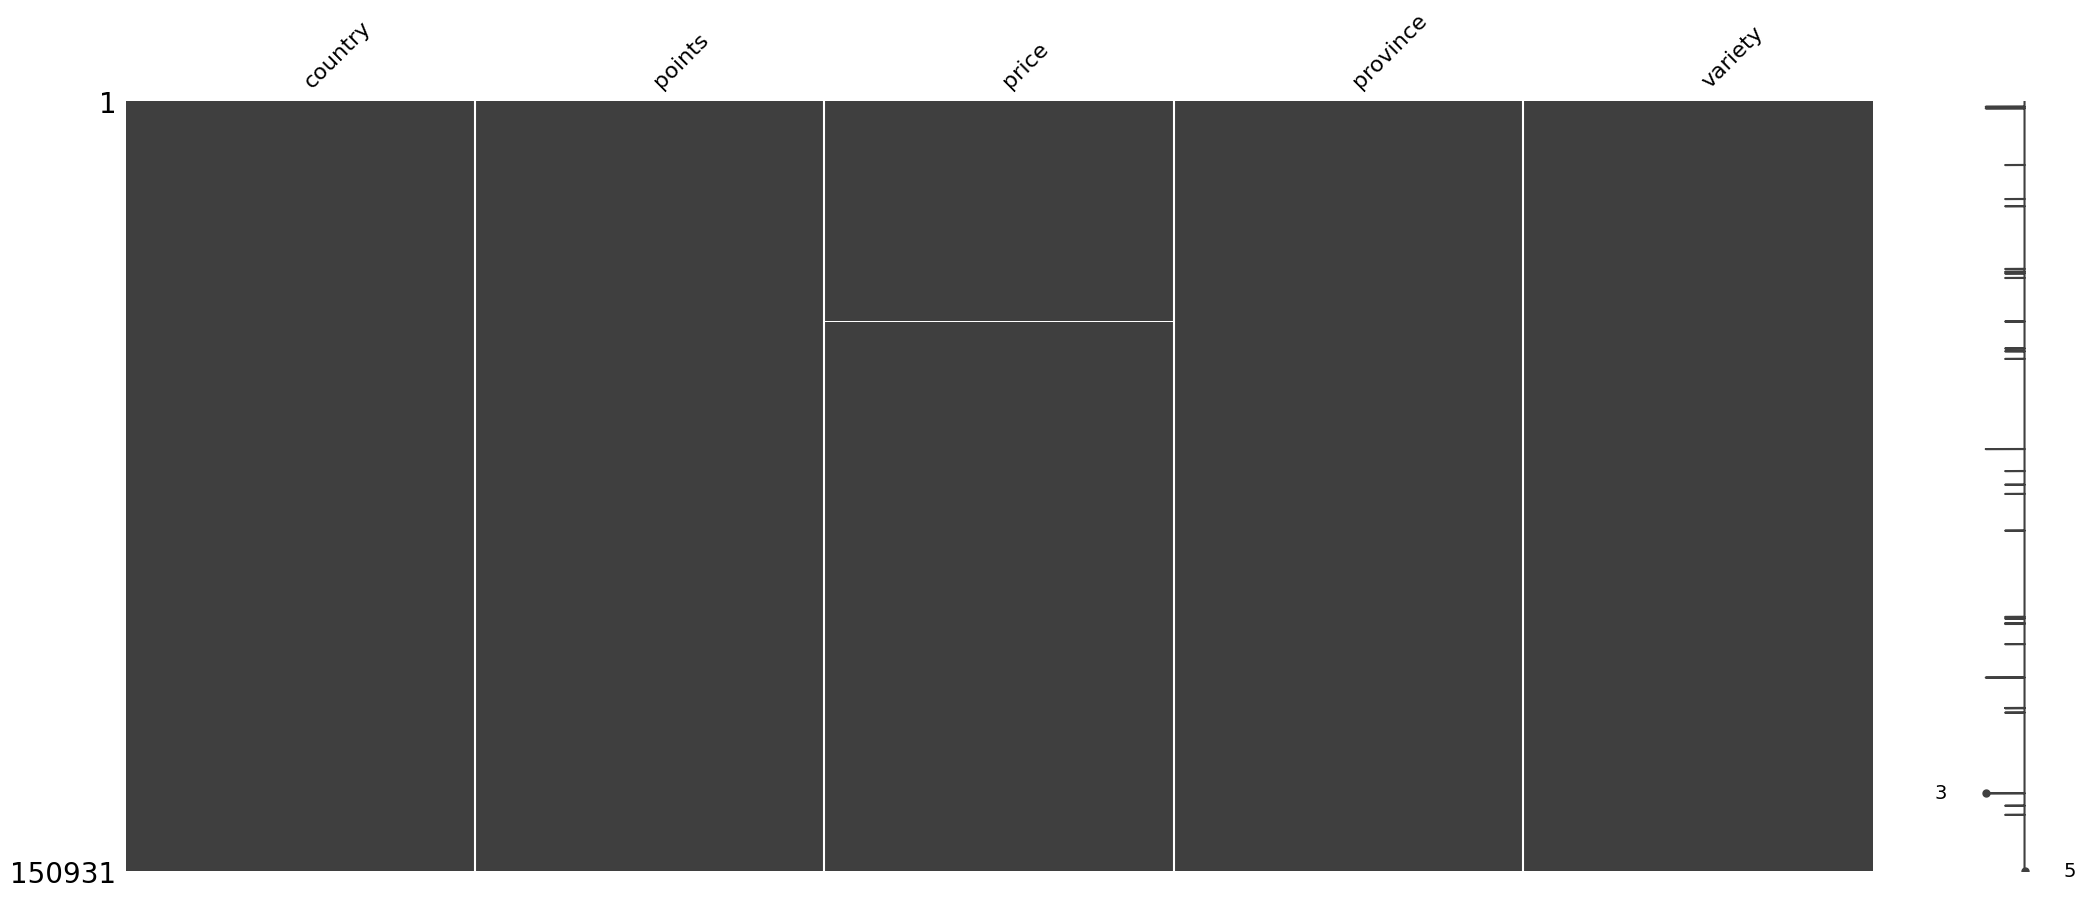

In [4]:
#### Data Cleaning #### 
winereviews_dirty = winereviews_dirty[['country', 'points', 'price', 'province', 'variety']]
# print(winereviews_dirty.head())

#msno.matrix(winereviews_dirty)
#plt.show()
# remove the designation of the vineyards, there are many missing values and it adds little value to analysis 
# price has many missing values as well - use average price of wines in that province to fill the null values 
avg_price_by_province = winereviews_dirty.groupby(['country', 'province'])['price'].transform('mean')
winereviews_dirty['price'].fillna(avg_price_by_province, inplace = True)

msno.matrix(winereviews_dirty)
plt.show()

In [5]:
print(winereviews_dirty['country'].value_counts())

country
US                        62397
Italy                     23478
France                    21099
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12


In [6]:
# Grouping by 'country' and 'province' and creating a new DataFrame
reviews_by_country = winereviews_dirty.groupby(['country', 'province']).apply(lambda x: x).reset_index(drop=True)
reviews_by_country.sort_values(by=['country', 'province'], inplace=True)

print(reviews_by_country)
winereviews_clean = reviews_by_country

          country  points  price          province  variety
0         Albania      88   20.0           Mirditë  Kallmet
1         Albania      88   20.0           Mirditë  Kallmet
2       Argentina      91   30.0  Mendoza Province   Malbec
3       Argentina      91   25.0  Mendoza Province   Malbec
4       Argentina      86   12.0  Mendoza Province     Rosé
...           ...     ...    ...               ...      ...
150921    Uruguay      82   13.0           Uruguay   Tannat
150922    Uruguay      81   30.0           Uruguay   Tannat
150923    Uruguay      81   18.0           Uruguay   Tannat
150924    Uruguay      80   18.0           Uruguay   Tannat
150925    Uruguay      87   30.0           Uruguay   Tannat

[150926 rows x 5 columns]


/Applications/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


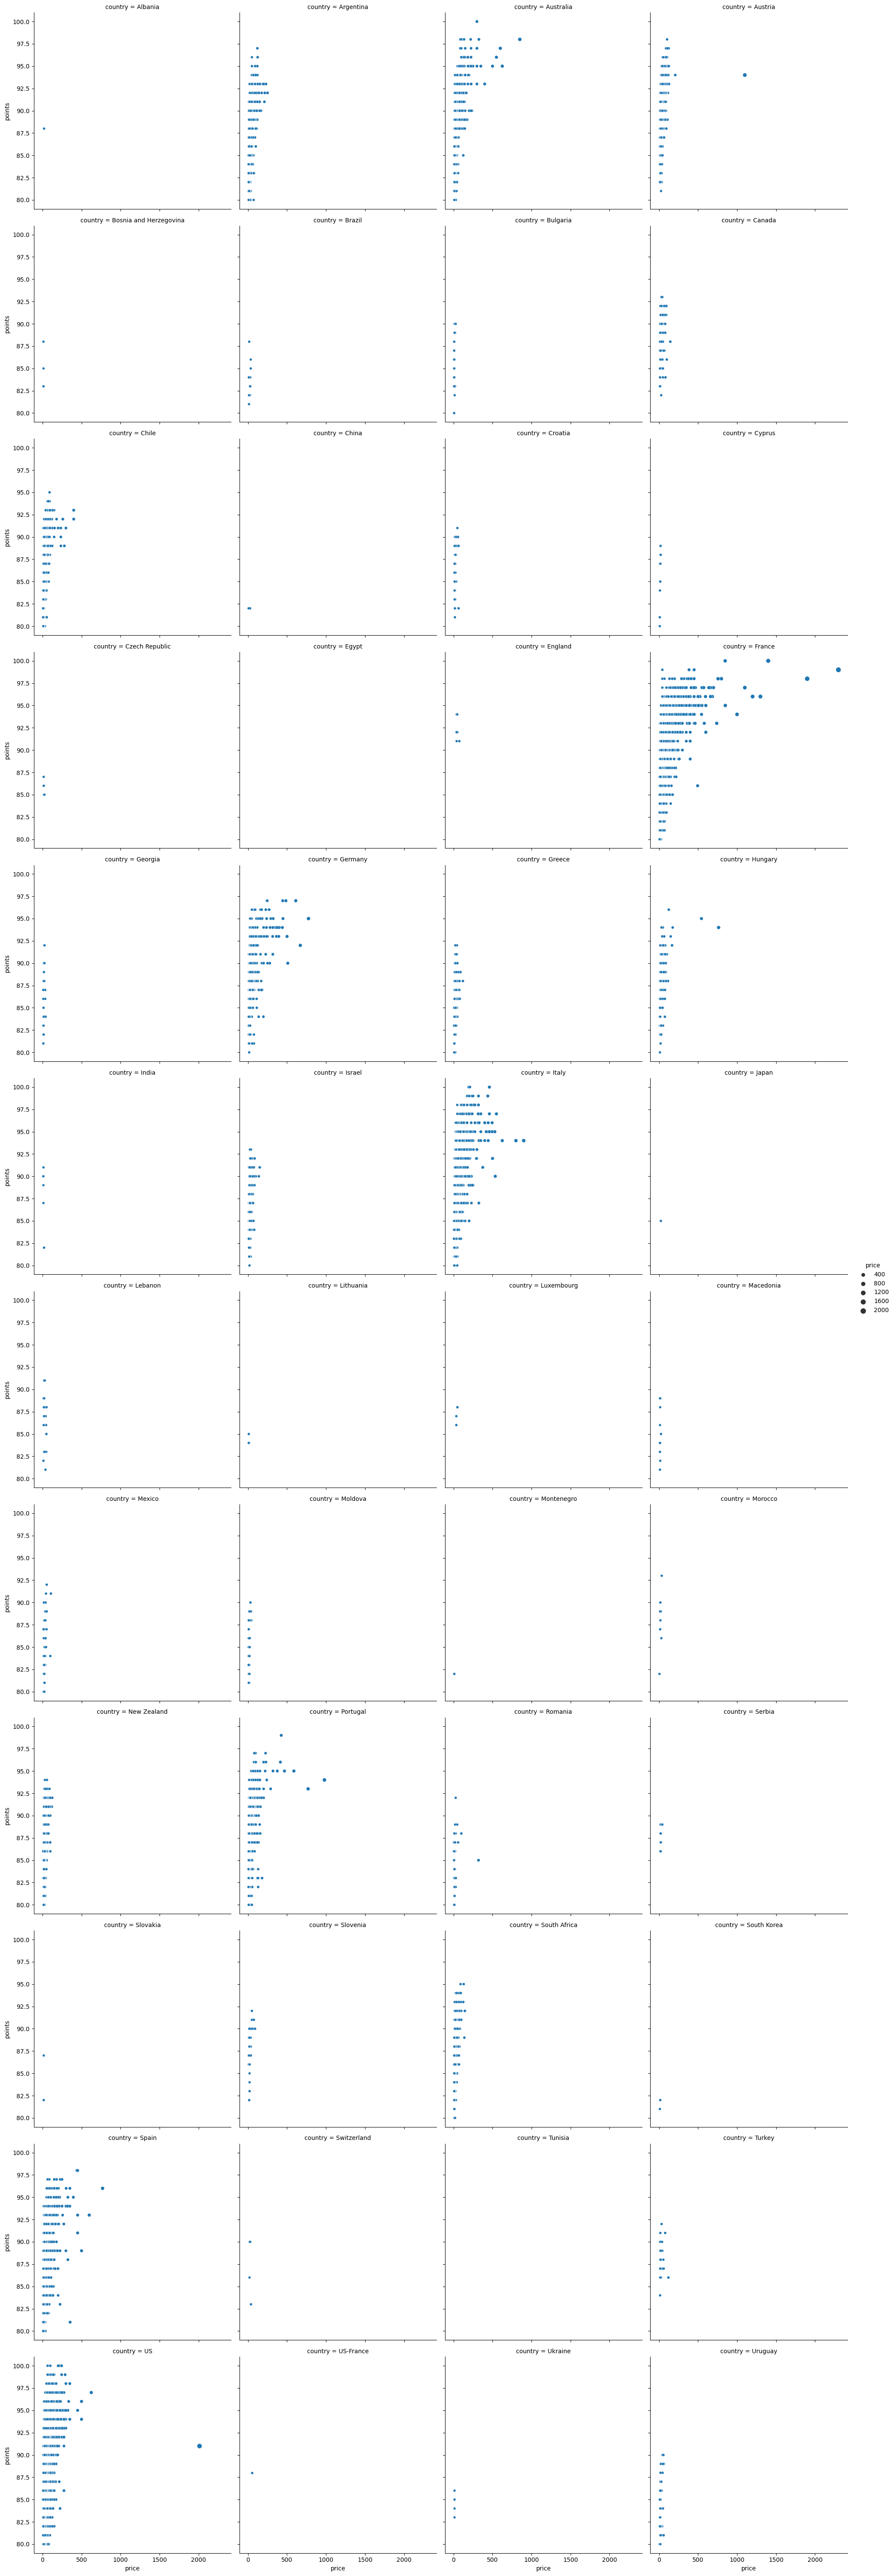

In [7]:
sns.relplot(x = 'price', y = 'points', data = winereviews_clean, col = 'country', size = 'price', col_wrap = 4)
plt.show()

/Applications/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2200x1000 with 0 Axes>

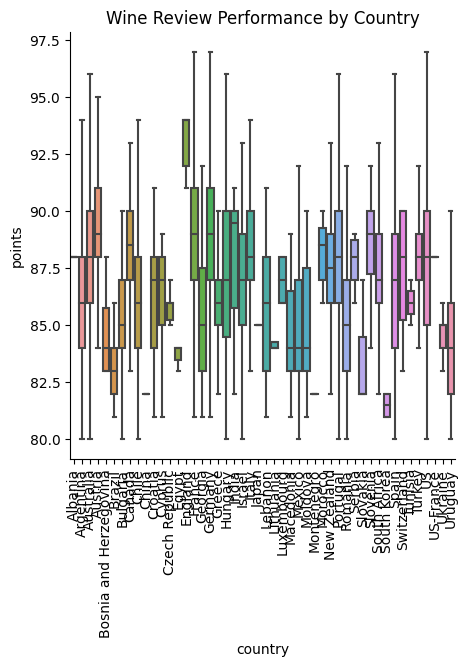

In [8]:
plt.figure(figsize = (22, 10))
sns.catplot(x = 'country', y = 'points', kind = 'box', data = winereviews_clean, sym = '')
plt.title('Wine Review Performance by Country')
plt.xticks(rotation = 90)
plt.show()

In [9]:
#### Average Price by Country ####
by_country = winereviews_clean.groupby('country').agg({'price': 'mean', 'points': 'mean'}).reset_index()
print(by_country.reset_index().head())

   index                 country      price     points
0      0                 Albania  20.000000  88.000000
1      1               Argentina  20.794805  85.996093
2      2               Australia  31.287140  87.892475
3      3                 Austria  31.113404  89.276742
4      4  Bosnia and Herzegovina  12.750000  84.750000


/var/folders/dg/_9r600ts4zvfks0mym4plplh0000gn/T/ipykernel_23012/1640206387.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(by_country['country'], rotation=90, ha='right')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


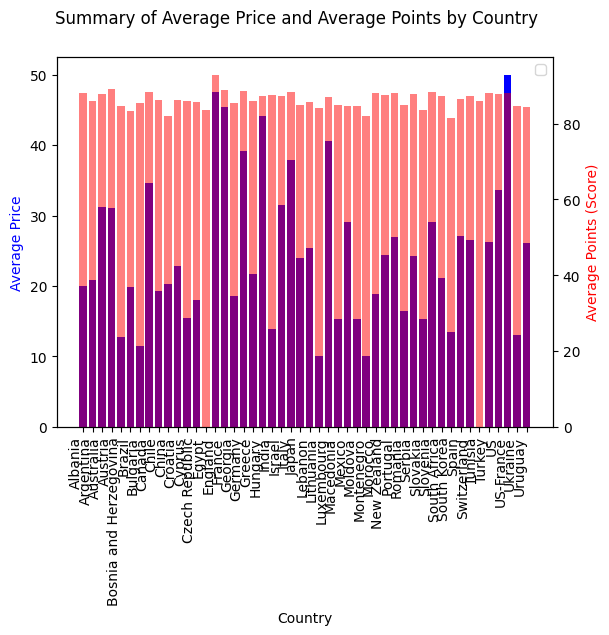

In [10]:
fig, ax = plt.subplots()

fig.suptitle('Summary of Average Price and Average Points by Country')

ax.bar(by_country['country'], by_country['price'], color = 'blue')
ax.set_xlabel('Country')
ax.set_xticklabels(by_country['country'], rotation=90, ha='right')
ax.set_ylabel('Average Price', color = 'blue')

ax2 = ax.twinx()

ax2.bar(by_country['country'], by_country['points'], color = 'red', alpha = 0.5)
ax2.set_xlabel('Country')
ax2.set_ylabel('Average Points (Score)', color = 'red')
plt.legend()
plt.show()

# from the bar chart we can get a clearer picture of where to go for cheaper wines of high quality 
# the wines are generally all high quality 

In [11]:
#### Finding the best scoring wines #### 
top_scorers = winereviews_clean[winereviews_clean['points'] > 90] # score > 90
top_scorers = top_scorers.drop_duplicates(subset = ['country', 'province']) # select only unique places for tourists to visit for wine 
top_scorers = top_scorers[~top_scorers['province'].str.contains('Other')] # if the location is not informative, remove it 
print(top_scorers.head())

print(top_scorers.shape) # reduced from >32,000 to just 182 
print(top_scorers['country'].value_counts())

         country  points  price           province             variety
2      Argentina      91   30.0   Mendoza Province              Malbec
6187   Australia      92   24.0    New South Wales            Sémillon
6439   Australia      98  125.0    South Australia              Shiraz
9486   Australia      91   36.0           Victoria          Pinot Noir
10100  Australia      92   29.0  Western Australia  Cabernet Sauvignon
(182, 5)
country
Portugal        27
Austria         23
Chile           23
South Africa    18
New Zealand     17
France          10
Germany          9
Italy            8
Israel           7
Spain            7
US               6
Greece           5
Australia        4
Hungary          2
Mexico           2
Slovenia         2
Canada           2
Turkey           2
India            1
Lebanon          1
Morocco          1
Georgia          1
England          1
Romania          1
Croatia          1
Argentina        1
Name: count, dtype: int64


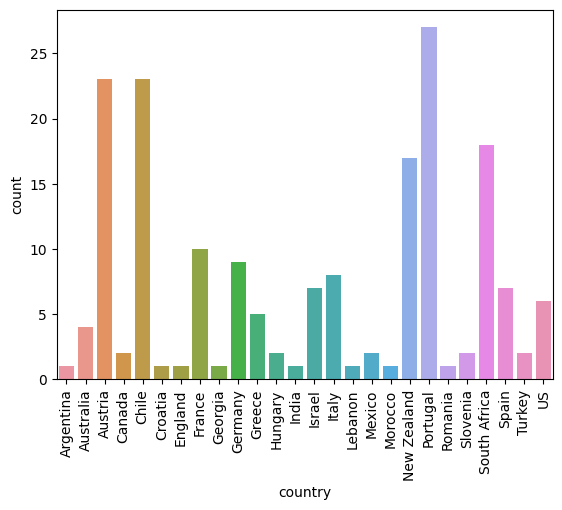

In [13]:
sns.countplot(x = 'country', data = top_scorers)
plt.xticks(rotation = 90)
plt.show()
# fly to Portugal as it has the most provinces with very high quality wine